<a href="https://colab.research.google.com/github/Kavishka0220/Intelligent-Street-Lighting-System/blob/main/PatternA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Display the first few rows of the dataset
print(df.head())

# Convert the target variable to binary based on the median
df['target_binary'] = (df['target'] > df['target'].median()).astype(int)

# Remove the original continuous target column (for logistic regression)
df.drop(columns=['target'], inplace=True)

# Display the first few rows of the updated dataset
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 

                    age       sex       bmi        bp        s1        s2  \
age            1.000000  0.173737  0.185085  0.335428  0.260061  0.219243   
sex            0.173737  1.000000  0.088161  0.241010  0.035277  0.142637   
bmi            0.185085  0.088161  1.000000  0.395411  0.249777  0.261170   
bp             0.335428  0.241010  0.395411  1.000000  0.242464  0.185548   
s1             0.260061  0.035277  0.249777  0.242464  1.000000  0.896663   
s2             0.219243  0.142637  0.261170  0.185548  0.896663  1.000000   
s3            -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455   
s4             0.203841  0.332115  0.413807  0.257650  0.542207  0.659817   
s5             0.270774  0.149916  0.446157  0.393480  0.515503  0.318357   
s6             0.301731  0.208133  0.388680  0.390430  0.325717  0.290600   
target_binary  0.157750  0.004534  0.460628  0.365951  0.160870  0.136549   

                     s3        s4        s5        s6  target_binary  
age 

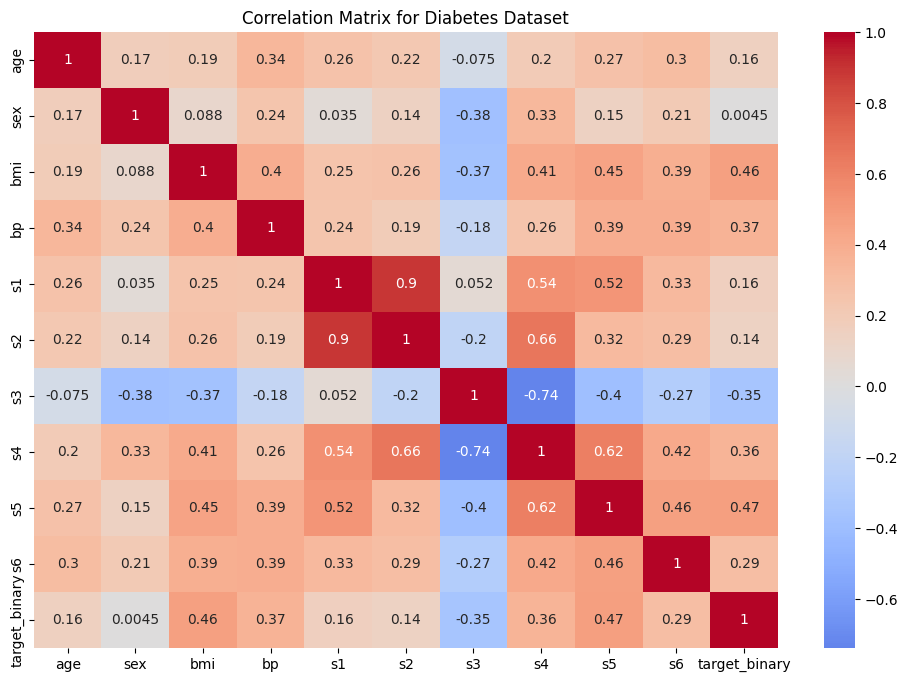

In [31]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix on the encoded DataFrame
correlation_matrix = df_encoded.corr()
print(correlation_matrix)
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

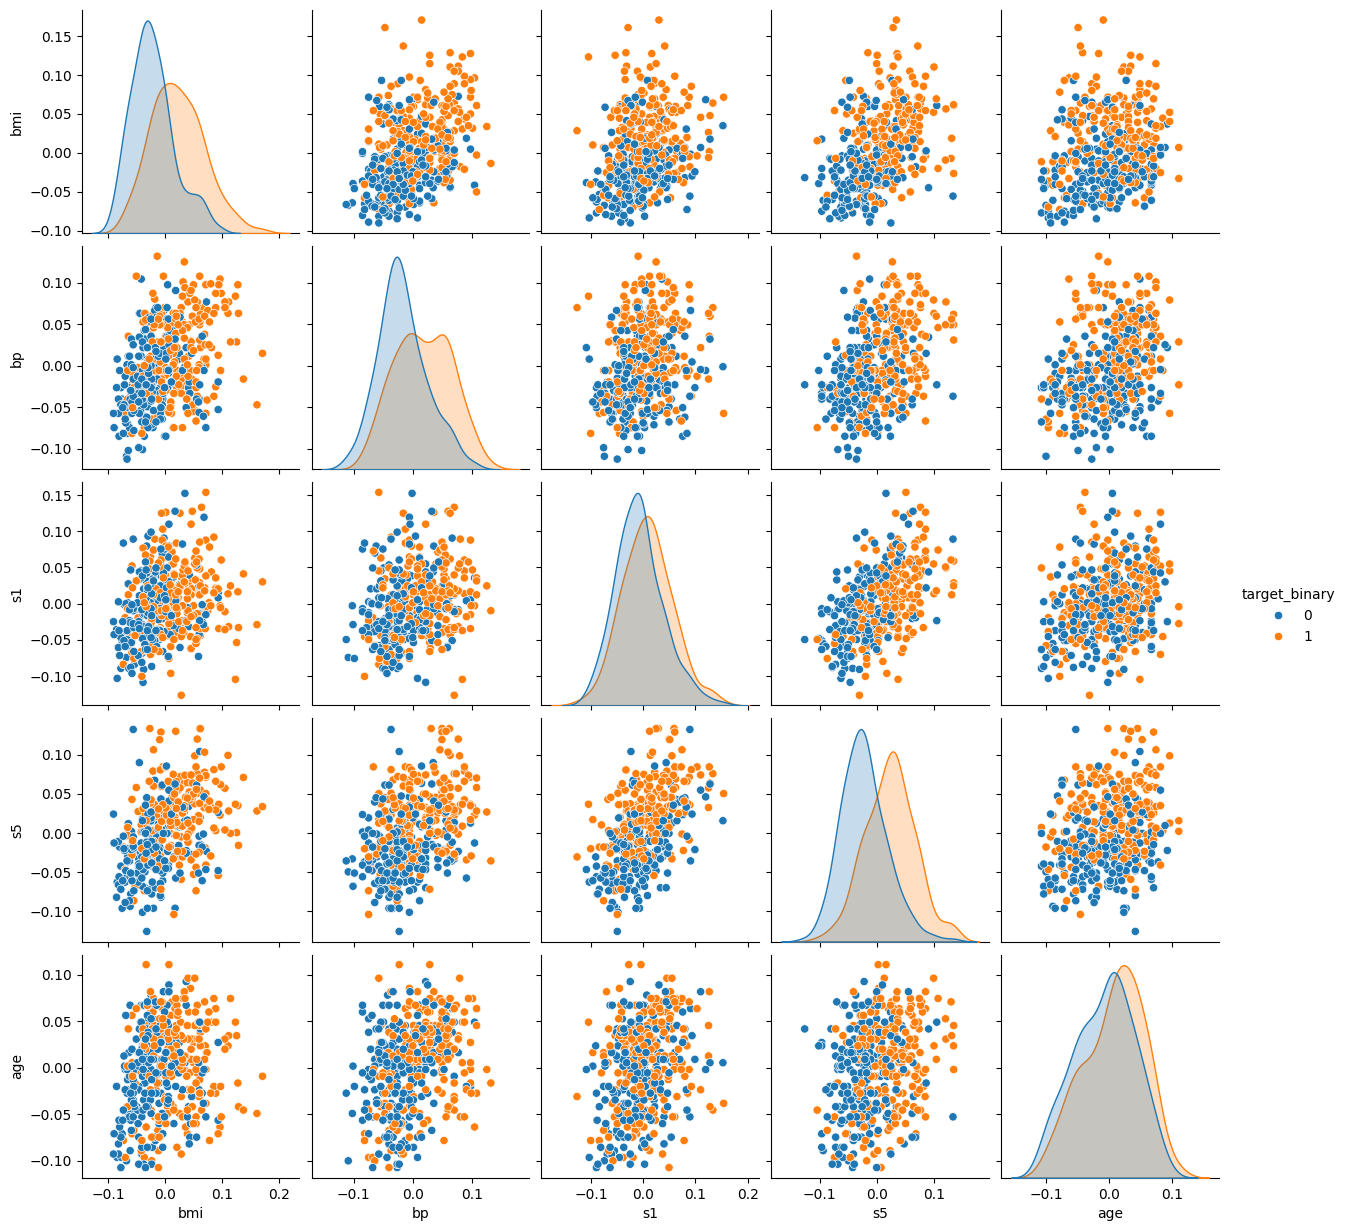

In [33]:
# Select up to 5 features for visualization
selected_features = ['bmi', 'bp', 's1', 's5', 'age']

# Create pairplot for selected features and target
sns.pairplot(df[selected_features + ['target_binary']], hue="target_binary")
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features and target variable
X = df[selected_features]
y = df['target_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7416


              precision    recall  f1-score   support

           0       0.78      0.73      0.76        49
           1       0.70      0.75      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



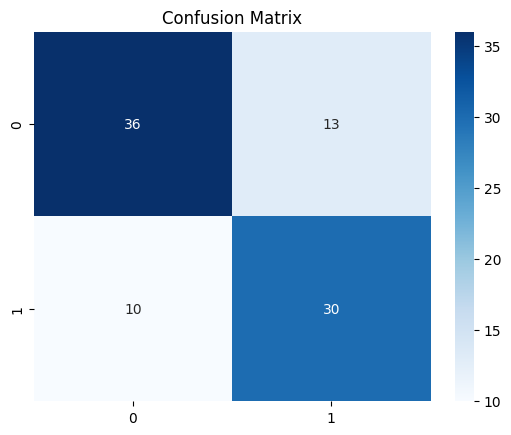

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix")
plt.show()


In [38]:
import statsmodels.api as sm

# Add a constant to the feature set (for intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result = logit_model.fit()

# Print the summary to get p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.497774
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          target_binary   No. Observations:                  353
Model:                          Logit   Df Residuals:                      347
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2815
Time:                        05:56:06   Log-Likelihood:                -175.71
converged:                       True   LL-Null:                       -244.57
Covariance Type:            nonrobust   LLR p-value:                 5.503e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0792      0.132      0.599      0.549      -0.180       0.338
bmi           18.9755      3.